In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test=pd.read_csv("test.csv")

In [6]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

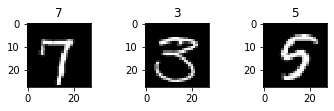

In [8]:
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [11]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]


C:\Users\yunus\Anaconda32\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


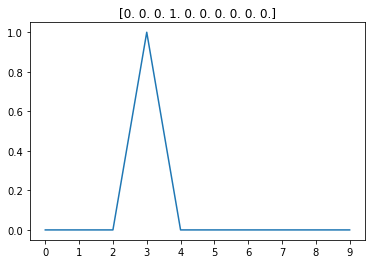

In [14]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [15]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

2 preprocessing steps for image data : 1) feature standardization
                                        2) One Hot Encoding of labels

In [16]:
seed = 43
np.random.seed(seed)

In [17]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [18]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

W0917 00:52:58.034121  3772 deprecation_wrapper.py:119] From C:\Users\yunus\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:52:58.484923  3772 deprecation_wrapper.py:119] From C:\Users\yunus\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:52:58.662740  3772 deprecation_wrapper.py:119] From C:\Users\yunus\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



input shape  (None, 28, 28, 1)
output shape  (None, 10)


NOTE : Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.
 Flatten will transform input into 1D array.
 Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [19]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',
 metrics=['accuracy'])

W0917 00:52:58.700419  3772 deprecation_wrapper.py:119] From C:\Users\yunus\Anaconda32\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:52:58.710412  3772 deprecation_wrapper.py:119] From C:\Users\yunus\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



Before making network ready for training, we have to make sure to add loss function, optimizer and metrics

In [20]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

To train, we will use the ‘fit()’ function on our model with the following five parameters: training data (train_X), target data (train_y), validation split, the number of epochs and callbacks.

### CROSS VALIDATION

In [21]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

SyntaxError: invalid syntax (<ipython-input-32-e3bdde1bfbea>, line 1)

In [90]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
37800/37800 [==============================] - 173s 5ms/step - loss: 0.2400 - acc: 0.9343 - val_loss: 0.3271 - val_acc: 0.9148
Epoch 2/3
37800/37800 [==============================] - 173s 5ms/step - loss: 0.2158 - acc: 0.9417 - val_loss: 0.3504 - val_acc: 0.9118
Epoch 3/3
37800/37800 [==============================] - 180s 5ms/step - loss: 0.2099 - acc: 0.9436 - val_loss: 0.3702 - val_acc: 0.9083
